# Project 3 ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("DataBase.csv", index_col="SpeciesId")

## Before using the values of the DB, we filled the values of the columns that we could find on the internet from a reliable source. We didn't fill the Predation, Exposure and Danger because we didn't know the parameters used for this scale.

In [3]:
df.head(10)

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,,,
1,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.0,3.3,20.7,NaN,NaN,38.6,645.0,3.0,5.0,3.0
2,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.6,8.3,15.7,6.3,2.0,4.5,42.0,3.0,1.0,3.0
3,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.0,8.7,15.3,NaN,NaN,1.0,26.0,NaN,NaN,NaN
4,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.5,12.5,11.5,NaN,NaN,14.0,60.0,1.0,1.0,1.0
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,7.4,NaN,NaN,9.0,25.0,5.0,2.0,3.0
6,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.000,4603.0,3.9,20.1,2.1,1.8,69.0,624.0,3.0,5.0,4.0
7,Baboon,Papio,Primates,Cercopithecidae,omni,nt,25.235,180.0,9.4,14.6,9.1,0.7,27.0,180.0,4.0,4.0,4.0
8,Big brown bat,Eptesicus,Chiroptera,Vespertilionidae,insecti,lc,0.023,0.3,19.7,4.3,15.8,3.9,19.0,35.0,1.0,1.0,1.0
9,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.0,5.2,18.8,NaN,NaN,50.0,360.0,NaN,NaN,NaN


In [4]:
df.describe()

,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
count,87.000000,87.000000,87.000000,87.000000,47.000000,64.000000,87.000000,87.000000,58.000000,58.000000,58.000000
mean,161.384310,196.405287,10.608046,13.393103,8.736170,1.995312,17.735632,128.000000,2.844828,2.362069,2.586207
std,768.846727,793.628150,4.465793,4.467481,3.679522,1.468011,17.782700,134.848343,1.496214,1.575005,1.426989
min,0.005000,0.000000,1.900000,4.100000,2.100000,0.100000,0.500000,12.000000,1.000000,1.000000,1.000000
25%,0.202500,0.000000,8.150000,10.250000,6.300000,0.900000,4.600000,30.000000,2.000000,1.000000,1.000000
50%,2.000000,5.500000,10.300000,13.700000,8.400000,1.800000,11.000000,63.000000,3.000000,2.000000,2.000000
75%,43.165000,64.000000,13.750000,15.850000,11.000000,2.600000,27.000000,180.000000,4.000000,4.000000,4.000000
max,6654.000000,5712.000000,19.900000,22.100000,17.900000,6.600000,100.000000,645.000000,5.000000,5.000000,5.000000


In [5]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     40
Dreaming        23
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

In [6]:
len(df)

87

Set the max rows shown in the results bigger to see every lines of the command

In [7]:
pd.set_option('display.max_rows', 500)

## The goal now is to fill in the best of our capacities the values missing of the important columns. The TotalSleep is full, without a missing value, so let's focus on the Dreaming state first.

We have not a missing value in TotalSleep, but we see a different number of missing value in the Dreaming and NonDreaming columns.
As those 3 columns are linked by the equation :
TotalSleep = Dreaming + NonDreaming, we can easily use 2 columns to fill the missing value without extrapolating from other values.

Let's start with filling the NonDreaming values

In [8]:
for index, row in df[df['NonDreaming'].isna() & df['Dreaming'].notna()].iterrows():
    df.loc[index, 'NonDreaming'] = df.loc[index,'TotalSleep'] - df.loc[index,'Dreaming']

In [9]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     22
Dreaming        23
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

Then we can do the inverse, and fill the Dreaming values missing

In [10]:
for index, row in df[df['NonDreaming'].notna() & df['Dreaming'].isna()].iterrows():
    df.loc[index, 'Dreaming'] = df.loc[index,'TotalSleep'] - df.loc[index,'NonDreaming']

In [11]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Awake            0
NonDreaming     22
Dreaming        22
LifeSpan         0
Gestation        0
Predation       29
Exposure        29
Danger          29
dtype: int64

Let's check if the Dreaming and NonDreaming values add up to the correct value of the TotalSleep.

In [12]:
for index, row in df[df['NonDreaming'].notna() & df['Dreaming'].notna()].iterrows():
    df.loc[index, 'TotalSleep_Difference'] = round((df.loc[index,'TotalSleep'] - df.loc[index,'NonDreaming'] - df.loc[index,'Dreaming']), 3)

In [13]:
df.loc[df['TotalSleep_Difference'].notna()]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,TotalSleep_Difference
SpeciesId,,,,,,,,,,,,,,,,,,
2,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.60,8.3,15.70,6.3,2.0,4.5,42.0,3.0,1.0,3.0,0.0
6,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.000,4603.00,3.9,20.10,2.1,1.8,69.0,624.0,3.0,5.0,4.0,-0.0
7,Baboon,Papio,Primates,Cercopithecidae,omni,nt,25.235,180.00,9.4,14.60,9.1,0.7,27.0,180.0,4.0,4.0,4.0,-0.4
8,Big brown bat,Eptesicus,Chiroptera,Vespertilionidae,insecti,lc,0.023,0.30,19.7,4.30,15.8,3.9,19.0,35.0,1.0,1.0,1.0,-0.0
10,Brazilian tapir,Tapirus,Perissodactyla,Tapiridae,herbi,vu,207.501,169.00,4.4,19.60,5.2,1.0,30.4,392.0,4.0,5.0,4.0,-1.8
11,Caspian seal,Phoca,Carnivora,Phocidae,carni,vu,86.000,0.00,3.5,20.50,3.1,0.4,42.0,330.0,NaN,NaN,NaN,-0.0
13,Chimpanzee,Pan,Primates,Hominidae,omni,en,52.200,440.00,9.7,14.30,8.3,1.4,50.0,230.0,1.0,1.0,1.0,-0.0
14,Chinchilla,Chinchilla,Rodentia,Chinchillidae,herbi,domesticated,0.420,6.40,12.5,11.50,11.0,1.5,7.0,112.0,5.0,4.0,4.0,0.0
16,Cotton rat,Sigmodon,Rodentia,Cricetidae,herbi,lc,0.148,1.18,11.3,12.70,10.2,1.1,6.0,27.0,NaN,NaN,NaN,-0.0


There's some values that are not 0, that means that this equation : TotalSleep = Dreaming + NonDreaming isn't true for these species. Let's plot them to see the disparities.

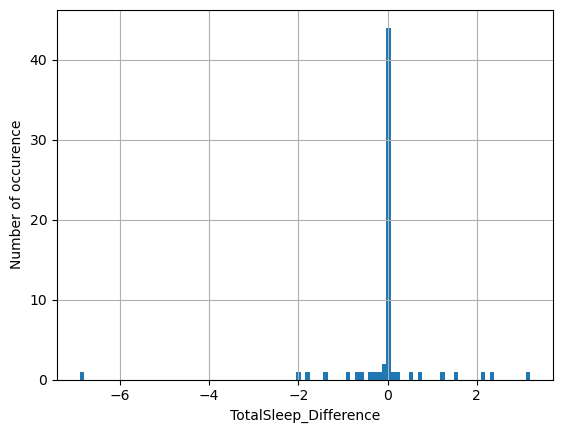

In [14]:
df.loc[df['TotalSleep_Difference'].notna(), "TotalSleep_Difference"].hist(bins = 100)
plt.xlabel('TotalSleep_Difference')
plt.ylabel('Number of occurence')
plt.show()

There's a bit of information to take from this histogram.
First, there is a clear outlier with a difference of more than 6 hours.

In [15]:
df.loc[df['TotalSleep_Difference'] < -5]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,TotalSleep_Difference
SpeciesId,,,,,,,,,,,,,,,,,,
82,Tree shrew,Tupaia,Scandentia,Ptilocercidae,omni,lc,0.104,2.5,8.9,15.1,13.2,2.6,2.3,46.0,3.0,2.0,2.0,-6.9


This might be a value error, but we can't know for sure which value is skewed, if it's TotalSleep or Dreming. So we will delete this row. The dataset is not very large, so we try our best to not delete rows, but this species is a clear outlier that will mess with the result more than anything.

In [16]:
df = df.drop(df[df['TotalSleep_Difference'] == -6.9].index,axis=0)

In [17]:
len(df)

86

Second information, there is quite a bit of values that are not equal to 0 this means that the Dreaming and NonDreaming values do not add up to the TotalSleep for some species. That could be problematic if we are to use these values for filling the rest, so we might as well try to correct these right now.

In [18]:
for index, row in df[(df['TotalSleep_Difference'].notna()) & (df['TotalSleep_Difference'] != 0)].iterrows():
    df.loc[index,'NonDreaming'] = df.loc[index,'NonDreaming'] + df.loc[index, 'TotalSleep_Difference'] / 2
    df.loc[index,'Dreaming'] = df.loc[index,'Dreaming'] + df.loc[index, 'TotalSleep_Difference'] / 2

Let's check if we corrected the values :

In [19]:
for index, row in df[df['NonDreaming'].notna() & df['Dreaming'].notna()].iterrows():
    df.loc[index, 'TotalSleep_Difference'] = round((df.loc[index,'TotalSleep'] - df.loc[index,'NonDreaming'] - df.loc[index,'Dreaming']), 3)

In [20]:
df.loc[df['TotalSleep_Difference'].notna(),'TotalSleep_Difference'].describe()

count    64.0
mean      0.0
std       0.0
min      -0.0
25%       0.0
50%      -0.0
75%       0.0
max      -0.0
Name: TotalSleep_Difference, dtype: float64

There's not a difference anymore between the TotalSleep value dans the sum of Dreaming and NonDreaming values. The +0 and -0 are because we rounded the value, but with the min = -0 and the max = 0, we have all the rounded values = 0

We can then drop the TotalSleep_Difference column that is no more usefull to us

In [21]:
df = df.drop(columns=['TotalSleep_Difference'])

In [22]:
df

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Awake,NonDreaming,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,,,
1,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.00,3.3,20.70,NaN,NaN,38.6,645.0,3.0,5.0,3.0
2,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.60,8.3,15.70,6.30,2.00,4.5,42.0,3.0,1.0,3.0
3,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.00,8.7,15.30,NaN,NaN,1.0,26.0,NaN,NaN,NaN
4,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.50,12.5,11.50,NaN,NaN,14.0,60.0,1.0,1.0,1.0
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.70,16.6,7.40,NaN,NaN,9.0,25.0,5.0,2.0,3.0
6,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.000,4603.00,3.9,20.10,2.10,1.80,69.0,624.0,3.0,5.0,4.0
7,Baboon,Papio,Primates,Cercopithecidae,omni,nt,25.235,180.00,9.4,14.60,8.90,0.50,27.0,180.0,4.0,4.0,4.0
8,Big brown bat,Eptesicus,Chiroptera,Vespertilionidae,insecti,lc,0.023,0.30,19.7,4.30,15.80,3.90,19.0,35.0,1.0,1.0,1.0
9,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.00,5.2,18.80,NaN,NaN,50.0,360.0,NaN,NaN,NaN


## Now that we have filled and corrected the Dreaming column without using artificial datas, let's do an early analysis to see which columns are usefull and which are not.

The Awake and NonDreaming columns are the complement of the column TotalSleep and Dreaming, they give no values that we already know, we will then drop them.

In [23]:
df = df.drop(columns=['Awake','NonDreaming'])

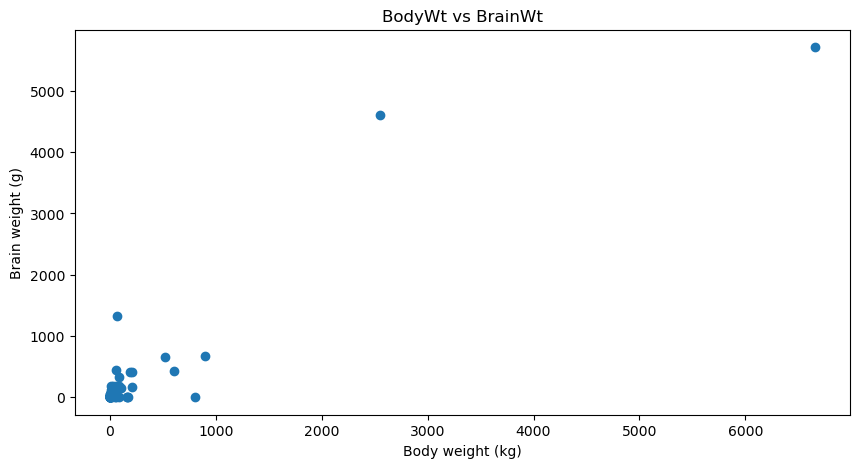

In [24]:
plt.figure(figsize=(10,5))
plt.scatter(df.BodyWt,df.BrainWt)
plt.title("BodyWt vs BrainWt")
plt.xlabel("Body weight (kg)")
plt.ylabel("Brain weight (g)")
plt.show()

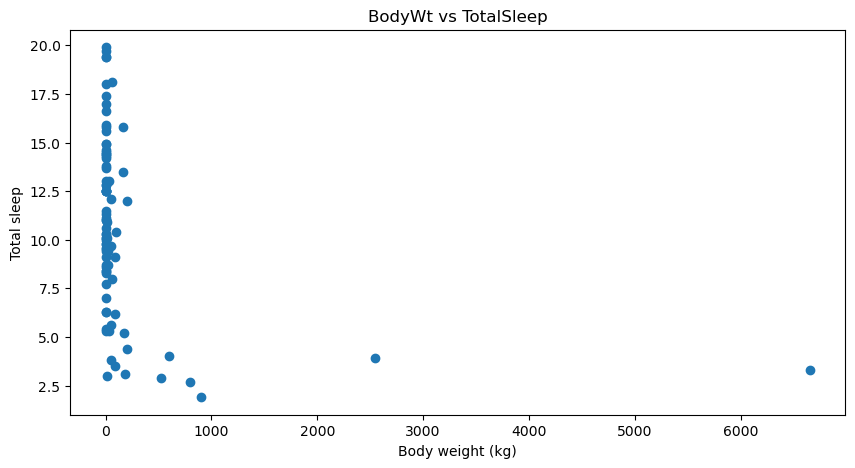

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(df.BodyWt,df.TotalSleep)
plt.title("BodyWt vs TotalSleep")
plt.xlabel("Body weight (kg)")
plt.ylabel("Total sleep")
plt.show()

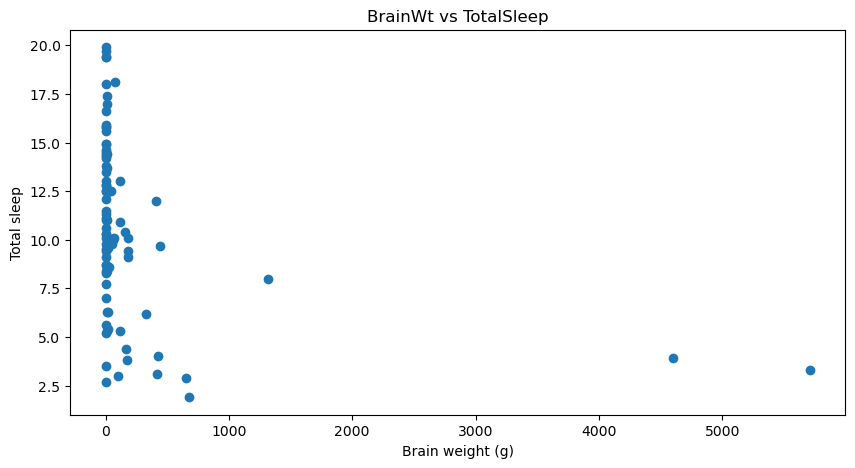

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(df.BrainWt,df.TotalSleep)
plt.title("BrainWt vs TotalSleep")
plt.xlabel("Brain weight (g)")
plt.ylabel("Total sleep")
plt.show()

There does not seems to have a relation between the BrainWt and the TotalSleep or the BodyWt and the TotalSleep. But we remark that both the BodyWt and the BrainWt might have a relation between them. We remarked that we have some 0 values in the BrainWt column, so our choice will be to keep the BodyWt if we have to choose one.So in order to not lost too much information, we will drop the BrainWt, and keep the BodyWt in our datas.

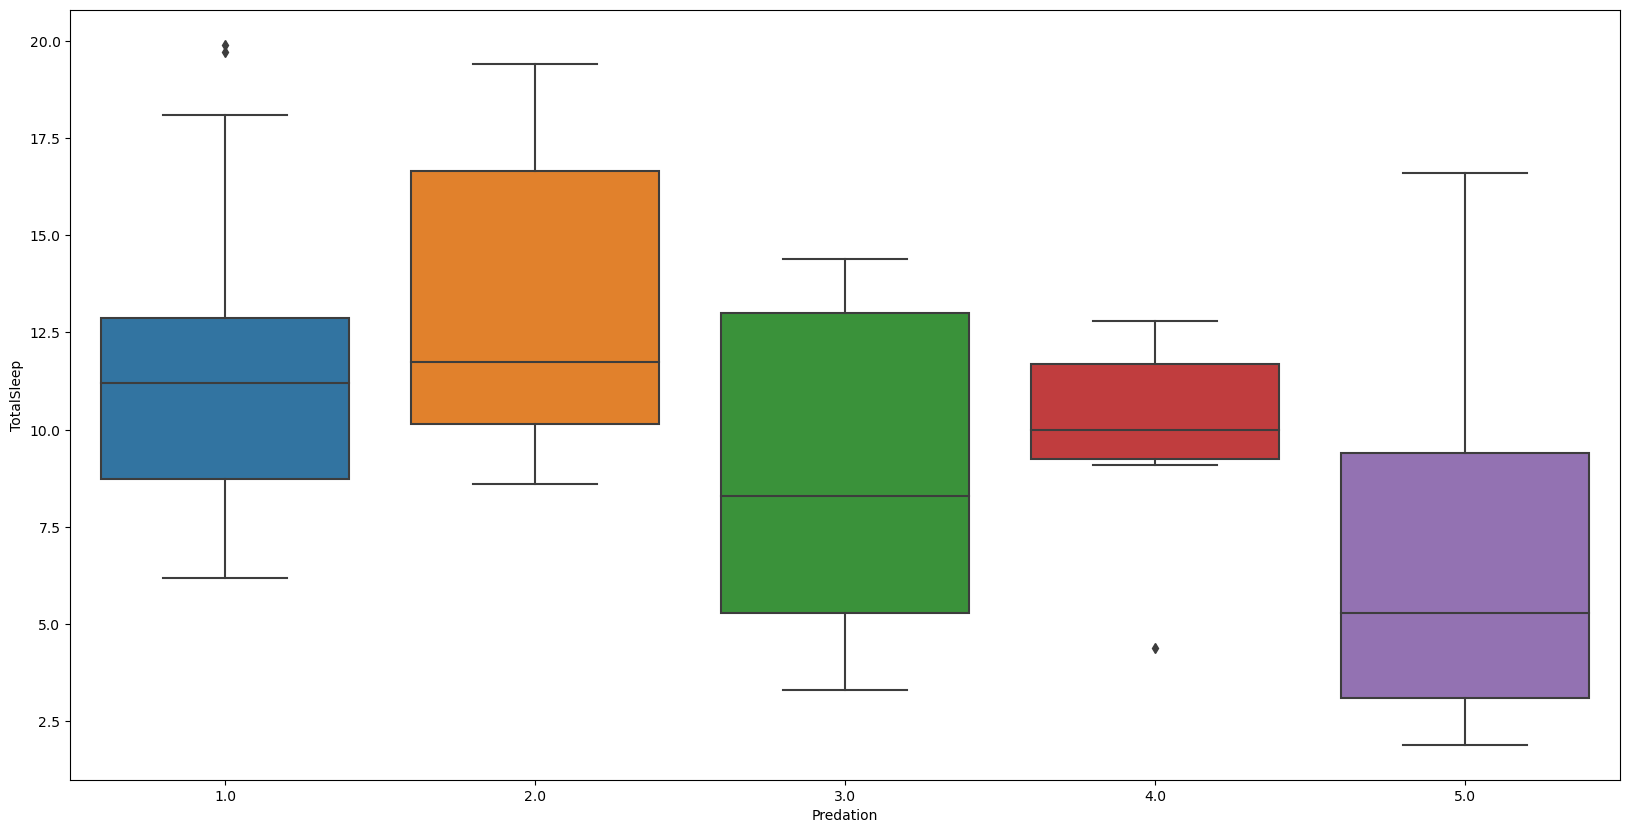

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Predation,y=df.TotalSleep)
plt.show()

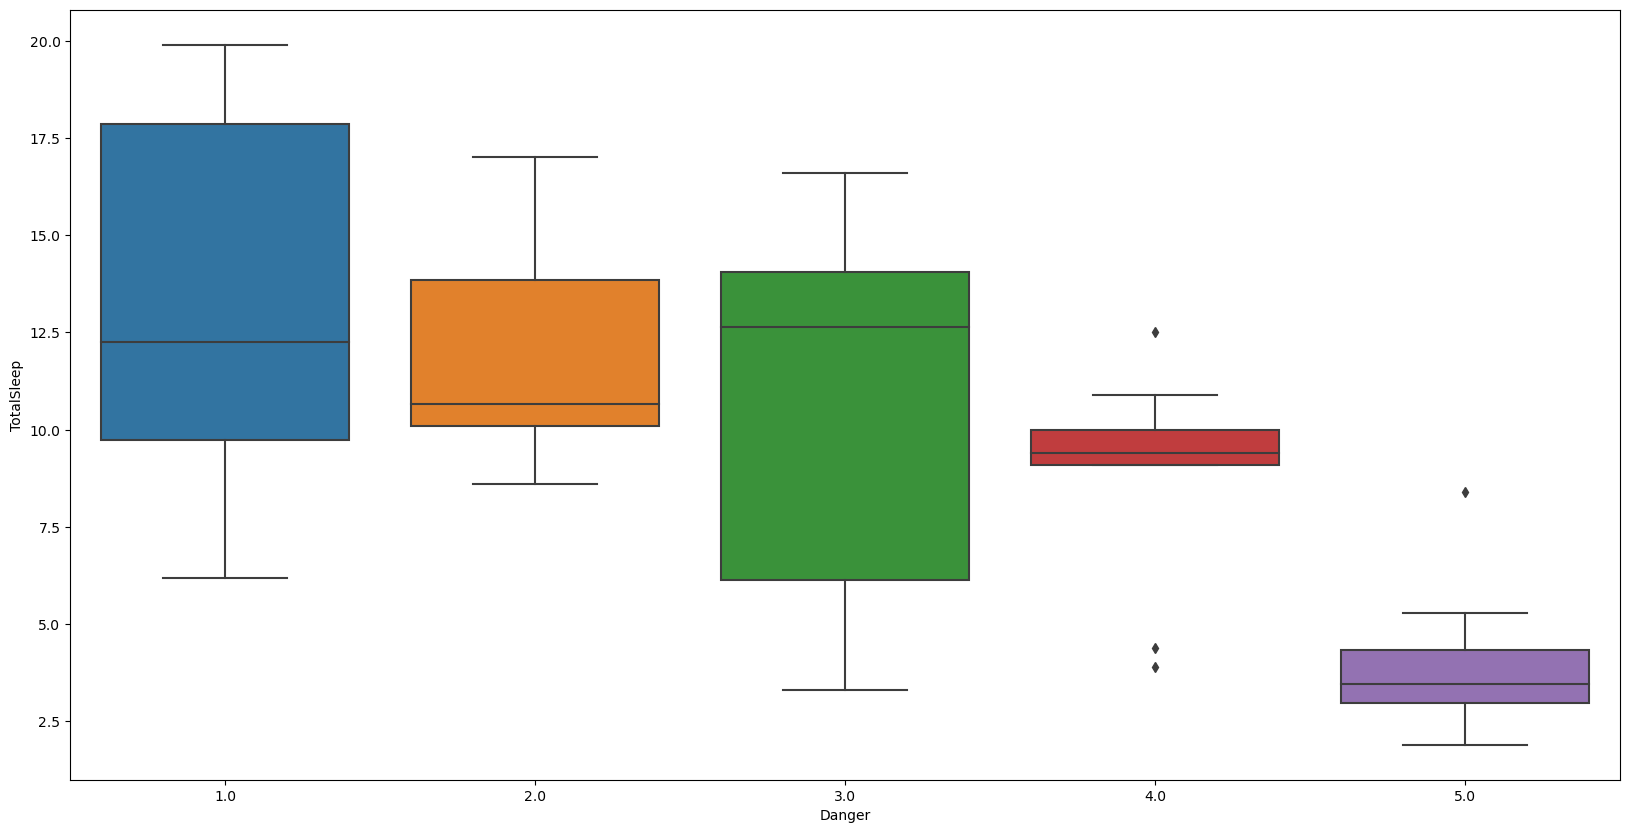

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Danger,y=df.TotalSleep)
plt.show()

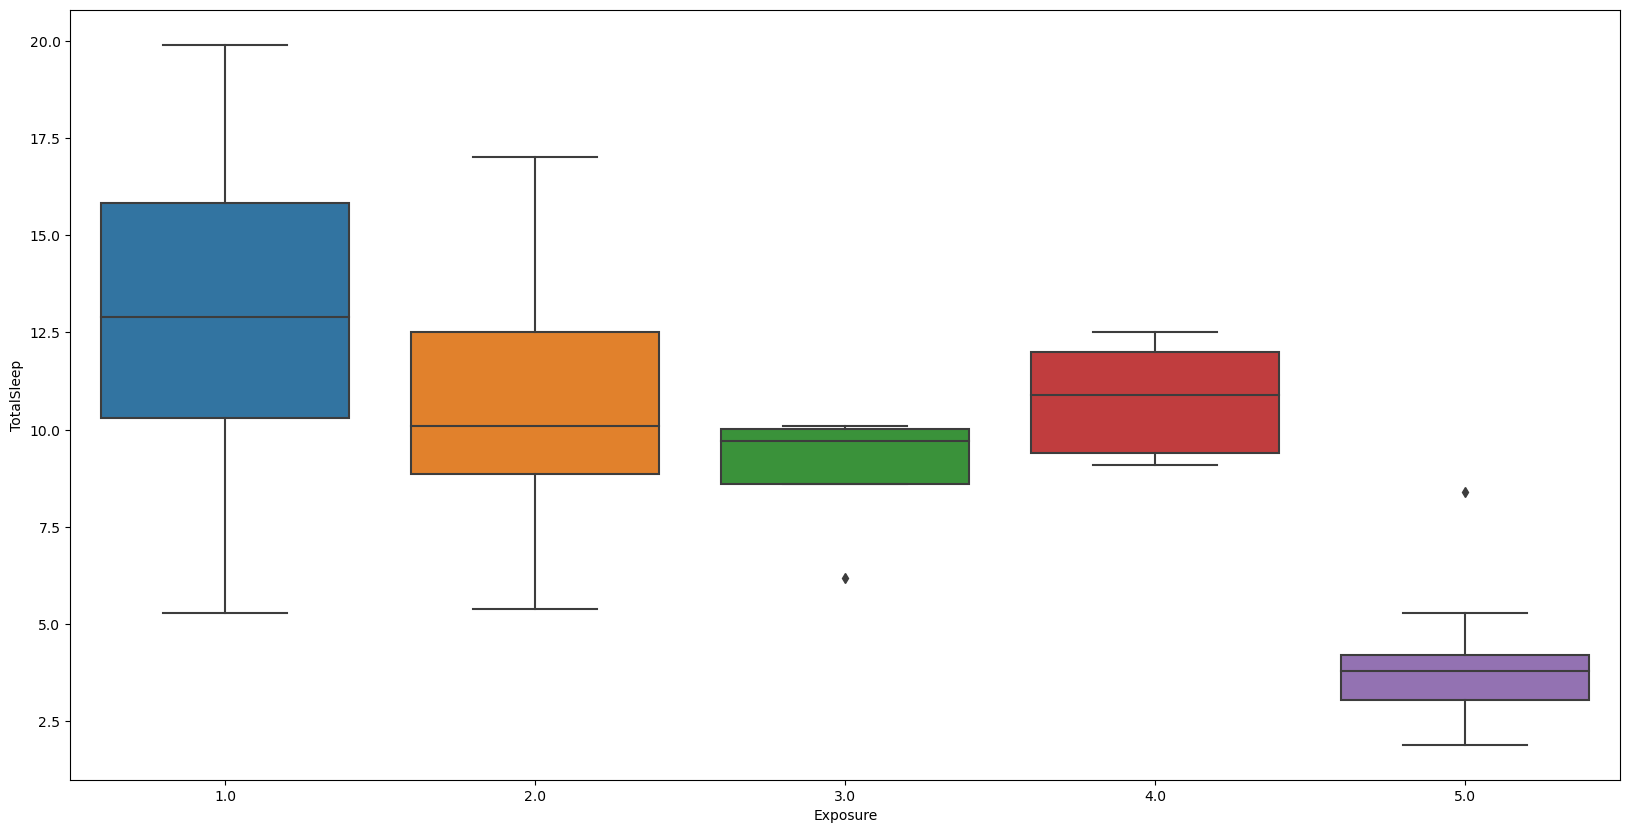

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Exposure,y=df.TotalSleep)
plt.show()

For each values of the P/E/D, we have a different repartition of the TotalSleep, meaning that there is a direct link between them, so we are keeping them for our study.

Let's study the vore of the species.

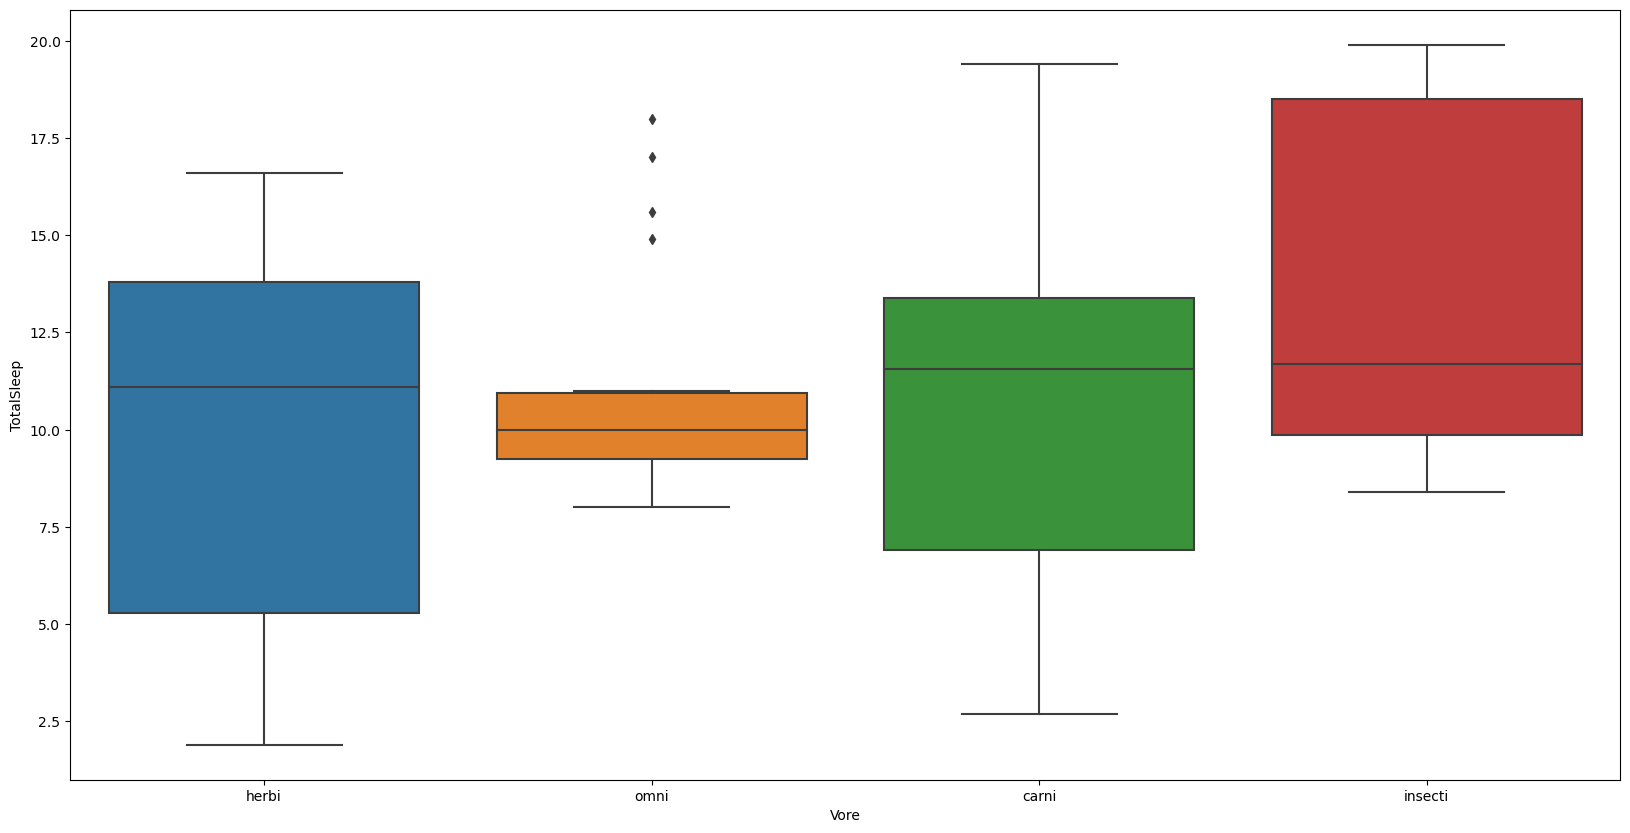

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Vore,y=df.TotalSleep)
plt.show()

There seems to be a link with TotalSleep and the vore of the species, we will keep this column, but we need to transform it in numerical values first.

In [31]:
df

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
1,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.00,3.3,NaN,38.6,645.0,3.0,5.0,3.0
2,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.60,8.3,2.00,4.5,42.0,3.0,1.0,3.0
3,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.00,8.7,NaN,1.0,26.0,NaN,NaN,NaN
4,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.50,12.5,NaN,14.0,60.0,1.0,1.0,1.0
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.70,16.6,NaN,9.0,25.0,5.0,2.0,3.0
6,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.000,4603.00,3.9,1.80,69.0,624.0,3.0,5.0,4.0
7,Baboon,Papio,Primates,Cercopithecidae,omni,nt,25.235,180.00,9.4,0.50,27.0,180.0,4.0,4.0,4.0
8,Big brown bat,Eptesicus,Chiroptera,Vespertilionidae,insecti,lc,0.023,0.30,19.7,3.90,19.0,35.0,1.0,1.0,1.0
9,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.00,5.2,NaN,50.0,360.0,NaN,NaN,NaN


Let's check the Conservation column

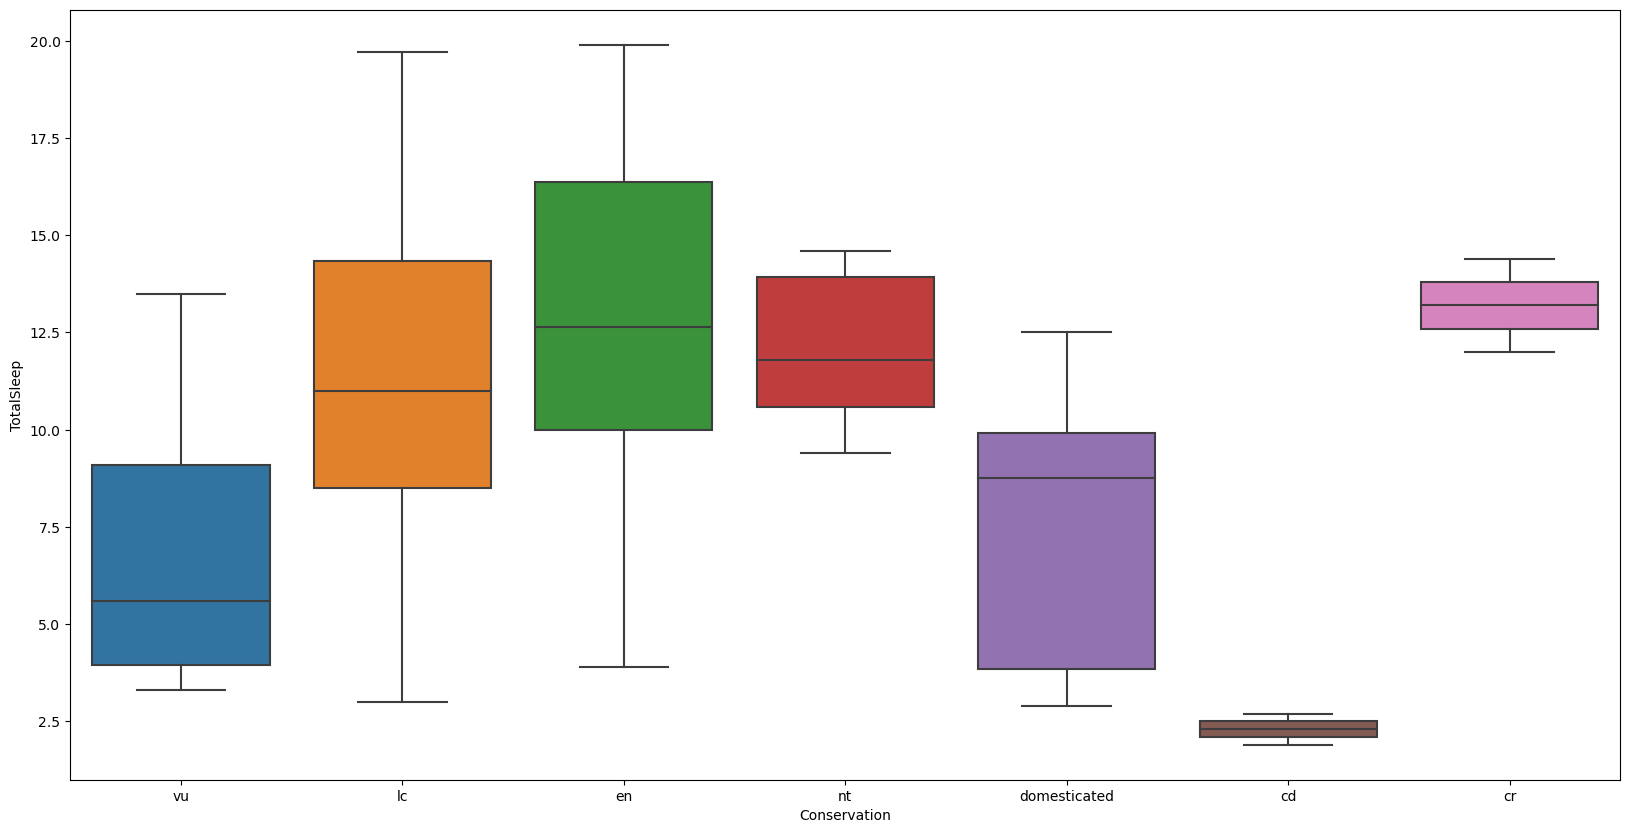

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Conservation,y=df.TotalSleep)
plt.show()

There seems to be a link with TotalSleep and the Conservation of the species, we will keep this column, but we need to transform it in numerical values first.

In [33]:
df

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
1,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.00,3.3,NaN,38.6,645.0,3.0,5.0,3.0
2,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.60,8.3,2.00,4.5,42.0,3.0,1.0,3.0
3,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.00,8.7,NaN,1.0,26.0,NaN,NaN,NaN
4,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.50,12.5,NaN,14.0,60.0,1.0,1.0,1.0
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.70,16.6,NaN,9.0,25.0,5.0,2.0,3.0
6,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.000,4603.00,3.9,1.80,69.0,624.0,3.0,5.0,4.0
7,Baboon,Papio,Primates,Cercopithecidae,omni,nt,25.235,180.00,9.4,0.50,27.0,180.0,4.0,4.0,4.0
8,Big brown bat,Eptesicus,Chiroptera,Vespertilionidae,insecti,lc,0.023,0.30,19.7,3.90,19.0,35.0,1.0,1.0,1.0
9,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.00,5.2,NaN,50.0,360.0,NaN,NaN,NaN


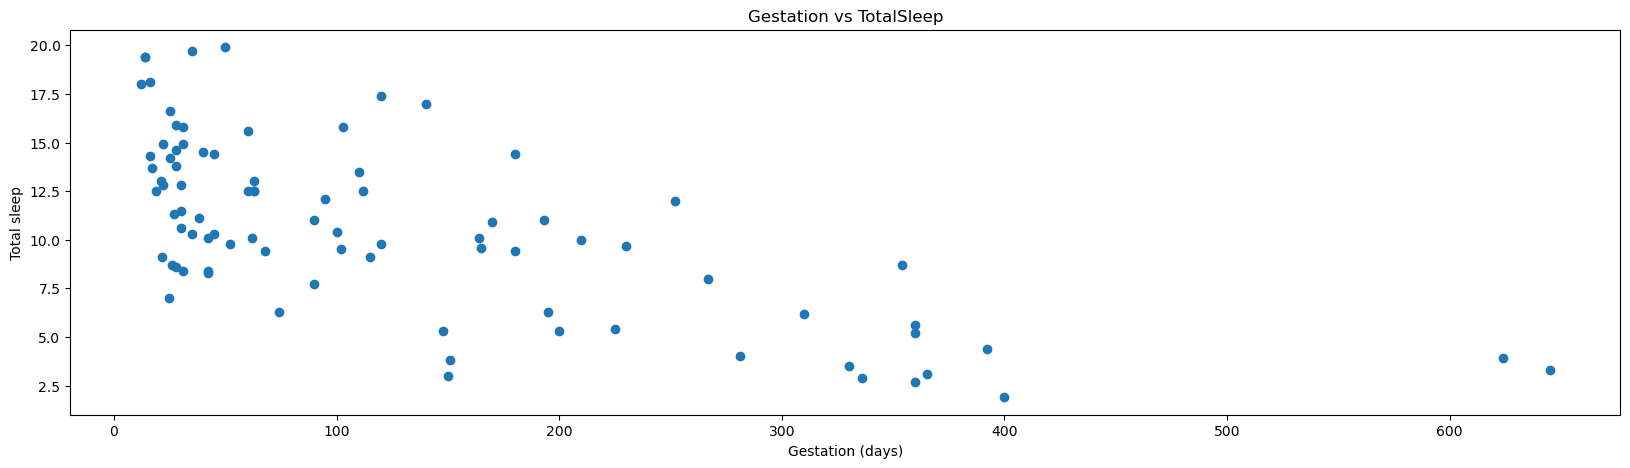

In [34]:
df_sorted = df
df_sorted['Gestation'] = pd.to_numeric(df['Gestation'], errors='coerce')
plt.figure(figsize=(20,5))
plt.scatter(df_sorted.Gestation, df_sorted.TotalSleep)
plt.title("Gestation vs TotalSleep")
plt.xlabel("Gestation (days)")
plt.ylabel("Total sleep")
plt.show()

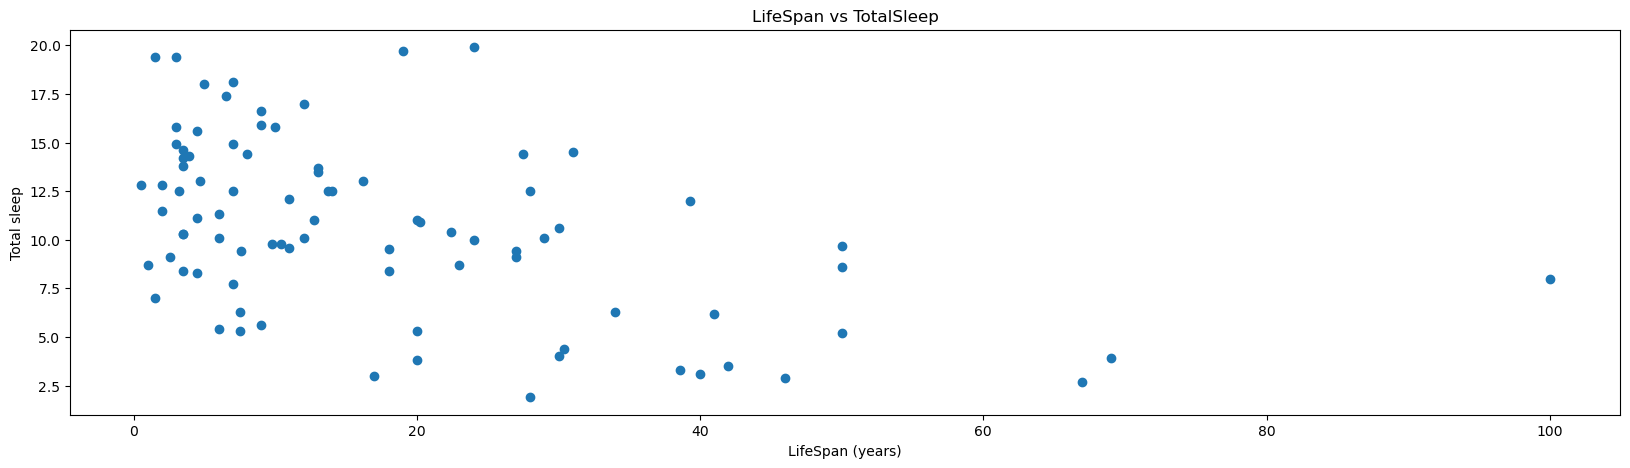

In [35]:
df_sortedL = df
df_sortedL['LifeSpan'] = pd.to_numeric(df_sortedL['LifeSpan'], errors='coerce')
plt.figure(figsize=(20,5))
plt.scatter(df_sortedL.LifeSpan, df_sortedL.TotalSleep)
plt.title("LifeSpan vs TotalSleep")
plt.xlabel("LifeSpan (years)")
plt.ylabel("Total sleep")
plt.show()

Awake and NonDreaming, they are the complement of 2 columns already existing, TotalSleep and Dreaming, so it's data that we already have

We need to make a choice for the Genus, Family and Order columns. Keeping the Genus column seems counter productive, we will add 80 columns to our dataframes that only have 86 rows. So we can drop this one.

For the Family and the Order columns, the choice is harder to make. We can't keep both of them because as said for the Genus, we will have too many predictors than observations, and we will have the risk of getting model overfitting.

In [36]:
df.Family.value_counts()

Family
Cricetidae          7
Sciuridae           5
Felidae             5
Muridae             4
Cercopithecidae     4
Bovidae             3
Didelphidae         3
Canidae             3
Soricidae           3
Procaviidae         3
Hominidae           3
Lorisidae           2
Talpidae            2
Equidae             2
Erinaceidae         2
Elephantidae        2
Phocidae            2
Delphinidae         2
Vespertilionidae    2
Cervidae            1
Tachyglossidae      1
Cebidae             1
\tCanidae           1
Procyonidae         1
Leporidae           1
Tenrecidae          1
Potoroidae          1
Suidae              1
Phalangeridae       1
Aotidae             1
Otariidae           1
Giraffidae          1
Aplodontiidae       1
Lemuridae           1
Spalacidae          1
Dasypodidae         1
Caviidae            1
Nesomyidae          1
Chlamyphoridae      1
Viverridae          1
Galagidae           1
Octodontidae        1
Phocoenidae         1
Chinchillidae       1
Tapiridae           1
Bra

If we choose to keep the Family, we have 27 species that are alone in their Families, without other species. That means that we won't be able to train our model on this column because there will be only one Family in either the train or the test sample. 

It's the same problem with the species that are 2 in the same Family. If both of the represented species end up in the same sample, we won't be able to train the model on these values. 

We currently have 8 Families with only 2 species, which mean that we will average 8 species that won't be trained. If we have the 27 species that doesn't share their family with another species, we have 35 species. Almost half of our datas.

In [37]:
df.Order.value_counts()

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Name: count, dtype: int64

If we choose to keep the Order column instead, we have only 4 species that doesn't share their Order with and 10 species that have only 2 representation in their Order.

We chose to keep the Order column. While keeping the Family column would grant us a better accuracy on certains species and only certain ones, by choosing to go with the Order, we stabilize our model for a larger set of datas

We will delete the Genus and Family column, and transform the Order one in numerical value after we used them to fill for the still missing values.

In [38]:
df

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
1,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.00,3.3,NaN,38.6,645.0,3.0,5.0,3.0
2,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.60,8.3,2.00,4.5,42.0,3.0,1.0,3.0
3,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.00,8.7,NaN,1.0,26.0,NaN,NaN,NaN
4,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.50,12.5,NaN,14.0,60.0,1.0,1.0,1.0
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.70,16.6,NaN,9.0,25.0,5.0,2.0,3.0
6,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.000,4603.00,3.9,1.80,69.0,624.0,3.0,5.0,4.0
7,Baboon,Papio,Primates,Cercopithecidae,omni,nt,25.235,180.00,9.4,0.50,27.0,180.0,4.0,4.0,4.0
8,Big brown bat,Eptesicus,Chiroptera,Vespertilionidae,insecti,lc,0.023,0.30,19.7,3.90,19.0,35.0,1.0,1.0,1.0
9,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.00,5.2,NaN,50.0,360.0,NaN,NaN,NaN


## Now let's use some extrapolations to fill the missing values in the column that we chose to keep. We will be using the mean of the Genus they belong to first. That's the group that will allow us to have the best accuracy first.

Let's see which Genus have more than one species

In [39]:
df.Genus.value_counts()

Genus
Panthera         3
Spermophilus     3
Equus            2
Canis            2
Vulpes           2
Oryctolagus      1
Potorous         1
Globicephalus    1
Sus              1
Phalanger        1
Erythrocebus     1
Aotus            1
Onychomys        1
Callorhinus      1
Didelphis        1
Suncus           1
Aplodontia       1
Lemur            1
Meriones         1
Spalax           1
Macaca           1
Perodicticus     1
Chironectes      1
Microtus         1
Procyon          1
Calomys          1
Cercopithecus    1
Dendrohyrax      1
Bradypus         1
Lutreolina       1
Tenrec           1
Condylura        1
Saimiri          1
Nyctibeus        1
Tachyglossus     1
Ovis             1
Neofiber         1
Capreolus        1
Procavia         1
Myotis           1
Dasypus          1
Loxodonta        1
Cryptotis        1
Felis            1
Octodon          1
Peromyscus       1
Bos              1
Sigmodon         1
Phocoena         1
Chinchilla       1
Pan              1
Acinonyx         1
Phoca 

We can use these 5 Genus : Spermophilus, Panthera, Equus, Vulpes, Canis if the species with missing value belong to them.

Let's check it out for Spermophilus

In [40]:
df.loc[df['Genus'] == "Spermophilus"]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,NaN,9.0,25.0,5.0,2.0,3.0
33,Golden-mantled ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.205,4.0,15.9,4.45,9.0,28.0,5.0,1.0,3.0
78,Thirteen-lined ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.101,4.0,13.8,3.40,3.5,28.0,NaN,NaN,NaN


In [41]:
Sum_Dreaming = df.loc[(df.Genus == 'Spermophilus'),"Dreaming"].sum()
Sum_TotalSleep = df.loc[(df.Genus == 'Spermophilus') & (df.Dreaming.notna()),"TotalSleep"].sum()

In [42]:
print(Sum_Dreaming)
print(Sum_TotalSleep)

7.85
29.700000000000003


In [43]:
Percentage_Dreaming = Sum_Dreaming / Sum_TotalSleep
print(Percentage_Dreaming)

0.2643097643097643


In [44]:
for index, row in df[(df['Genus'] == 'Spermophilus') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [45]:
df.loc[df['Genus'] == "Spermophilus"]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,4.39,9.0,25.0,5.0,2.0,3.0
33,Golden-mantled ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.205,4.0,15.9,4.45,9.0,28.0,5.0,1.0,3.0
78,Thirteen-lined ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.101,4.0,13.8,3.40,3.5,28.0,NaN,NaN,NaN


For the P/E/D, we need to make a choice. What has been decided for the rest of this project, is to take the mean of the values of the other species, be it in their Genus or Order group, and to round it to its superior value.
This means that, for exemple, for the Exposure of the Thirteen-lined squirrel, we will have round((2+1)/2) = round(1.5) = 2.

In [46]:
for index, row in df[(df['Genus'] == 'Spermophilus') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Genus'] == 'Spermophilus', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Genus'] == 'Spermophilus', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Genus'] == 'Spermophilus', 'Danger'].mean())

In [47]:
df.loc[df['Genus'] == "Spermophilus"]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.7,16.6,4.39,9.0,25.0,5.0,2.0,3.0
33,Golden-mantled ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.205,4.0,15.9,4.45,9.0,28.0,5.0,1.0,3.0
78,Thirteen-lined ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.101,4.0,13.8,3.40,3.5,28.0,5.0,2.0,3.0


Let's check that everything has been filed

In [48]:
df.loc[df['Genus'] == "Spermophilus"].isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

Let's see if we can do the same for the Genus Panthera :

In [49]:
df.loc[df['Genus'] == "Panthera"]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
43,Jaguar,Panthera,Carnivora,Felidae,carni,nt,100.000,157.0,10.4,NaN,22.4,100.0,1.0,1.0,1.0
46,Lion,Panthera,Carnivora,Felidae,carni,vu,161.499,0.0,13.5,NaN,13.0,110.0,NaN,NaN,NaN
80,Tiger,Panthera,Carnivora,Felidae,carni,en,162.564,0.0,15.8,NaN,10.0,103.0,NaN,NaN,NaN


We can't use the Panthera Genus to fill in the Dreaming state, because none of the species have a value. We will need to rely on their Family or Order.

We can use the Jaguar to fill for the Lion and Tiger in the Predation, Exposure and Danger.

In [50]:
for index, row in df[(df['Genus'] == 'Panthera') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Genus'] == 'Panthera', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Genus'] == 'Panthera', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Genus'] == 'Panthera', 'Danger'].mean())

Let's check if everything has been filed :

In [51]:
df.loc[df['Genus'] == "Panthera"]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
43,Jaguar,Panthera,Carnivora,Felidae,carni,nt,100.000,157.0,10.4,NaN,22.4,100.0,1.0,1.0,1.0
46,Lion,Panthera,Carnivora,Felidae,carni,vu,161.499,0.0,13.5,NaN,13.0,110.0,1.0,1.0,1.0
80,Tiger,Panthera,Carnivora,Felidae,carni,en,162.564,0.0,15.8,NaN,10.0,103.0,1.0,1.0,1.0


In [52]:
df.loc[df['Genus'] == 'Panthera'].isnull().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        3
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

Let's check the Genus Equus :

In [53]:
df.loc[df['Genus'] == "Equus"].isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

There is no values to be filled, the rows are fine by themselves.

Let's check the Genus Vulpes :

In [54]:
df.loc[df['Genus'] == "Vulpes"].isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        1
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

There are one Dreaming value to be filled for one row.

In [55]:
df.loc[df['Genus'] == "Vulpes"]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
4,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.38,44.5,12.5,NaN,14.0,60.0,1.0,1.0,1.0
67,Red fox,Vulpes,Carnivora,\tCanidae,carni,lc,4.23,50.4,9.8,2.4,9.8,52.0,1.0,1.0,1.0


In [56]:
Percentage_Dreaming = df.loc[(df.Genus == 'Vulpes'),"Dreaming"].sum() / df.loc[(df.Genus == 'Vulpes') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.24489795918367344


In [57]:
for index, row in df[(df['Genus'] == 'Vulpes') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

Let's check if the values have been filed

In [58]:
df.loc[df['Genus'] == "Vulpes"].isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

Let's check the Genus Canis :

In [59]:
df.loc[df['Genus'] == "Canis"]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
21,Dog,Canis,Carnivora,Canidae,carni,domesticated,14.00,70.0,10.1,2.9,12.0,62.0,NaN,NaN,NaN
37,Gray wolf,Canis,Carnivora,Canidae,carni,lc,36.33,119.5,13.0,NaN,16.2,63.0,1.0,1.0,1.0


We can use the Predation, Exposure and Danger of Gray wolf for the Dog

In [60]:
for index, row in df[(df['Genus'] == 'Canis') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Genus'] == 'Canis', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Genus'] == 'Canis', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Genus'] == 'Canis', 'Danger'].mean())

We can fill in the same way the Gray wolf's Dreaming value :

In [61]:
Percentage_Dreaming = df.loc[(df.Genus == 'Canis'),"Dreaming"].sum() / df.loc[(df.Genus == 'Canis') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.2871287128712871


In [62]:
for index, row in df[(df['Genus'] == 'Canis') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

Let's check if all the values have been filed

In [63]:
df.loc[df['Genus'] == 'Canis'].isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

## We managed to fill the NAs for the species belonging to a Genus with multiple species, let's see how many NAs are left, and let's fill them using their Family

In [64]:
df.Family.count()

86

In [65]:
df.Family.value_counts().sort_index()

Family
\tCanidae           1
Aotidae             1
Aplodontiidae       1
Bovidae             3
Bradypodidae        1
Canidae             3
Caviidae            1
Cebidae             1
Cercopithecidae     4
Cervidae            1
Chinchillidae       1
Chlamyphoridae      1
Cricetidae          7
Dasypodidae         1
Delphinidae         2
Didelphidae         3
Elephantidae        2
Equidae             2
Erinaceidae         2
Felidae             5
Galagidae           1
Giraffidae          1
Hominidae           3
Lemuridae           1
Leporidae           1
Lorisidae           2
Muridae             4
Nesomyidae          1
Octodontidae        1
Otariidae           1
Phalangeridae       1
Phocidae            2
Phocoenidae         1
Potoroidae          1
Procaviidae         3
Procyonidae         1
Sciuridae           5
Soricidae           3
Spalacidae          1
Suidae              1
Tachyglossidae      1
Talpidae            2
Tapiridae           1
Tenrecidae          1
Vespertilionidae    2
Viv

In [66]:
columns_to_check = ['Dreaming','Predation','Danger','Exposure']

na_counts = df.groupby('Family')[columns_to_check].apply(lambda x: x.isna().sum()).reset_index()
print(na_counts)

              Family  Dreaming  Predation  Danger  Exposure
0          \tCanidae         0          0       0         0
1            Aotidae         0          0       0         0
2      Aplodontiidae         0          0       0         0
3            Bovidae         0          0       0         0
4       Bradypodidae         0          1       1         1
5            Canidae         0          0       0         0
6           Caviidae         0          0       0         0
7            Cebidae         0          1       1         1
8    Cercopithecidae         0          0       0         0
9           Cervidae         1          0       0         0
10     Chinchillidae         0          0       0         0
11    Chlamyphoridae         0          0       0         0
12        Cricetidae         4          6       6         6
13       Dasypodidae         0          0       0         0
14       Delphinidae         1          2       2         2
15       Didelphidae         0          

With the help of the 2 arrays above, we can determine that we will be able to use the following families to fill the missing values :
Cricetidae, Delphinidae, Didelphidae, Elephantidae, Felidae, Hominidae, Lorisidae, Muridae, Phocidae, Sciuridae and Soricidae.

### Cricetidae : 

In [67]:
for index, row in df[(df['Family'] == 'Cricetidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Cricetidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Cricetidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Cricetidae', 'Danger'].mean())

In [68]:
Percentage_Dreaming = df.loc[(df.Family == 'Cricetidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Cricetidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.185785536159601


In [69]:
for index, row in df[(df['Family'] == 'Cricetidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [70]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming        15
LifeSpan         0
Gestation        0
Predation       19
Exposure        19
Danger          19
dtype: int64

### Delphinidae

For this family, the Predation, Exposure and Danger columns are already filled

In [71]:
Percentage_Dreaming = df.loc[(df.Family == 'Delphinidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Delphinidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.037037037037037035


In [72]:
for index, row in df[(df['Family'] == 'Delphinidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [73]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming        14
LifeSpan         0
Gestation        0
Predation       19
Exposure        19
Danger          19
dtype: int64

### Didelphidae

In [74]:
for index, row in df[(df['Family'] == 'Didelphidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Didelphidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Didelphidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Didelphidae', 'Danger'].mean())


In [75]:
Percentage_Dreaming = df.loc[(df.Family == 'Didelphidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Didelphidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.31866197183098594


In [76]:
for index, row in df[(df['Family'] == 'Didelphidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [77]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming        14
LifeSpan         0
Gestation        0
Predation       18
Exposure        18
Danger          18
dtype: int64

### Elephantidae

In [78]:
for index, row in df[(df['Family'] == 'Elephantidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Elephantidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Elephantidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Elephantidae', 'Danger'].mean())

In [79]:
Percentage_Dreaming = df.loc[(df.Family == 'Elephantidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Elephantidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.46153846153846156


In [80]:
for index, row in df[(df['Family'] == 'Elephantidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

For this family, the dreaming column is already filled


In [81]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming        13
LifeSpan         0
Gestation        0
Predation       18
Exposure        18
Danger          18
dtype: int64

### Felidae

In [82]:
for index, row in df[(df['Family'] == 'Felidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Felidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Felidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Felidae', 'Danger'].mean())

In [83]:
Percentage_Dreaming = df.loc[(df.Family == 'Felidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Felidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.20800000000000002


In [84]:
for index, row in df[(df['Family'] == 'Felidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [85]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming         9
LifeSpan         0
Gestation        0
Predation       17
Exposure        17
Danger          17
dtype: int64

### Hominidae

In [86]:
for index, row in df[(df['Family'] == 'Hominidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Hominidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Hominidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Hominidae', 'Danger'].mean())


In [87]:
Percentage_Dreaming = df.loc[(df.Family == 'Hominidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Hominidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.1864406779661017


In [88]:
for index, row in df[(df['Family'] == 'Hominidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)


In [89]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming         8
LifeSpan         0
Gestation        0
Predation       17
Exposure        17
Danger          17
dtype: int64

### Lorisidae

In [90]:
for index, row in df[(df['Family'] == 'Lorisidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Lorisidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Lorisidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Lorisidae', 'Danger'].mean())

For this family, the dreaming column is already filled

In [91]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming         8
LifeSpan         0
Gestation        0
Predation       16
Exposure        16
Danger          16
dtype: int64

### Muridae

In [92]:
for index, row in df[(df['Family'] == 'Muridae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Muridae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Muridae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Muridae', 'Danger'].mean())

In [93]:
Percentage_Dreaming = df.loc[(df.Family == 'Muridae'),"Dreaming"].sum() / df.loc[(df.Family == 'Muridae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.13476070528967252


In [94]:
for index, row in df[(df['Family'] == 'Muridae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [95]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming         7
LifeSpan         0
Gestation        0
Predation       14
Exposure        14
Danger          14
dtype: int64

### Phocidae

In [96]:
for index, row in df[(df['Family'] == 'Phocidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Phocidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Phocidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Phocidae', 'Danger'].mean())

In [97]:
Percentage_Dreaming = df.loc[(df.Family == 'Phocidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Phocidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.1958762886597938


In [98]:
for index, row in df[(df['Family'] == 'Phocidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [99]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming         7
LifeSpan         0
Gestation        0
Predation       13
Exposure        13
Danger          13
dtype: int64

### Sciuridae

In [100]:
for index, row in df[(df['Family'] == 'Sciuridae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Sciuridae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Sciuridae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Sciuridae', 'Danger'].mean())

In [101]:
Percentage_Dreaming = df.loc[(df.Family == 'Sciuridae'),"Dreaming"].sum() / df.loc[(df.Family == 'Sciuridae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.26436285097192225


In [102]:
for index, row in df[(df['Family'] == 'Sciuridae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [103]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming         5
LifeSpan         0
Gestation        0
Predation       11
Exposure        11
Danger          11
dtype: int64

### Soricidae

In [104]:
for index, row in df[(df['Family'] == 'Soricidae') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Family'] == 'Soricidae', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Family'] == 'Soricidae', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Family'] == 'Soricidae', 'Danger'].mean())

In [105]:
Percentage_Dreaming = df.loc[(df.Family == 'Soricidae'),"Dreaming"].sum() / df.loc[(df.Family == 'Soricidae') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.15489130434782608


In [106]:
for index, row in df[(df['Family'] == 'Soricidae') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [107]:
df.isna().sum()

Species          0
Genus            0
Order            0
Family           0
Vore             0
Conservation     0
BodyWt           0
BrainWt          0
TotalSleep       0
Dreaming         5
LifeSpan         0
Gestation        0
Predation       10
Exposure        10
Danger          10
dtype: int64

## Let's end the value filling with the Order 

Let's check the missing values and the number of species inside each order. 

In [108]:
df['Order'].value_counts()

Order
Rodentia           22
Carnivora          14
Primates           13
Artiodactyla        6
Soricomorpha        5
Hyracoidea          3
Cetacea             3
Perissodactyla      3
Didelphimorphia     3
Diprotodontia       2
Proboscidea         2
Cingulata           2
Erinaceomorpha      2
Chiroptera          2
Lagomorpha          1
Monotremata         1
Afrosoricida        1
Pilosa              1
Name: count, dtype: int64

In [109]:
df[df.isna().any(axis=1)].Order.value_counts()


Order
Primates         4
Cetacea          3
Carnivora        2
Rodentia         1
Hyracoidea       1
Diprotodontia    1
Artiodactyla     1
Pilosa           1
Name: count, dtype: int64

There's 1 Order that have only 1 species with missing values (Pilosa). We're going to see after how we're going to deal with that. Let's focus first on the ones not concerned by this problem

In [110]:
df[df['Dreaming'].isna()]

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
15,Common porpoise,Phocoena,Cetacea,Phocoenidae,carni,vu,53.180,0.0,5.6,NaN,9.0,360.0,NaN,NaN,NaN
64,Potto,Perodicticus,Primates,Lorisidae,omni,lc,1.100,0.0,11.0,NaN,20.0,193.0,2.0,2.0,2.0
66,Raccoon,Procyon,Carnivora,Procyonidae,carni,lc,4.288,39.2,12.5,NaN,13.7,63.0,2.0,2.0,2.0
69,Roe deer,Capreolus,Artiodactyla,Cervidae,herbi,lc,14.800,98.2,3.0,NaN,17.0,150.0,5.0,5.0,5.0
73,Slow loris,Nyctibeus,Primates,Lorisidae,carni,en,1.400,12.5,11.0,NaN,12.7,90.0,2.0,2.0,2.0


We're going to have to fill the dreaming columns for those different orders : Cetacea, Primates, Carnivora, Artiodactyla and Proboscidea

### Primates

In [111]:
for index, row in df[(df['Order'] == 'Primates') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Order'] == 'Primates', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Order'] == 'Primates', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Order'] == 'Primates', 'Danger'].mean())

In [112]:
Percentage_Dreaming = df.loc[(df.Order == 'Primates'),"Dreaming"].sum() / df.loc[(df.Order == 'Primates') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.11801724137931036


In [113]:
for index, row in df[(df['Order'] == 'Primates') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [114]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        3
LifeSpan        0
Gestation       0
Predation       8
Exposure        8
Danger          8
dtype: int64

### Cetacea

for index, row in df[(df['Order'] == 'Cetacea') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Order'] == 'Cetacea', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Order'] == 'Cetacea', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Order'] == 'Cetacea', 'Danger'].mean())

We have an error, let's check the values :

In [115]:
df.loc[df['Order'] == 'Cetacea', ['Predation','Danger','Exposure']]

,Predation,Danger,Exposure
SpeciesId,,,
9,NaN,NaN,NaN
15,NaN,NaN,NaN
62,NaN,NaN,NaN


None of the species of this order have their Predation, Danger and Exposure filled, so we can't fill them using our method. We'll keeping filling the missing values and will resolve this problem later.

In [116]:
Percentage_Dreaming = df.loc[(df.Order == 'Cetacea'),"Dreaming"].sum() / df.loc[(df.Order == 'Cetacea') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.03670886075949367


In [117]:
for index, row in df[(df['Order'] == 'Cetacea') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [118]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        2
LifeSpan        0
Gestation       0
Predation       8
Exposure        8
Danger          8
dtype: int64

###  Carnivora

In [119]:
for index, row in df[(df['Order'] == 'Carnivora') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Order'] == 'Carnivora', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Order'] == 'Carnivora', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Order'] == 'Carnivora', 'Danger'].mean())

In [120]:
Percentage_Dreaming = df.loc[(df.Order == 'Carnivora'),"Dreaming"].sum() / df.loc[(df.Order == 'Carnivora') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.22447916666666662


In [121]:
for index, row in df[(df['Order'] == 'Carnivora') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [122]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        1
LifeSpan        0
Gestation       0
Predation       7
Exposure        7
Danger          7
dtype: int64

###  Hyracoidea

In [123]:
for index, row in df[(df['Order'] == 'Hyracoidea') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Order'] == 'Hyracoidea', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Order'] == 'Hyracoidea', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Order'] == 'Hyracoidea', 'Danger'].mean())

In [124]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        1
LifeSpan        0
Gestation       0
Predation       6
Exposure        6
Danger          6
dtype: int64

###  Diprotodontia

In [125]:
for index, row in df[(df['Order'] == 'Diprotodontia') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Order'] == 'Diprotodontia', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Order'] == 'Diprotodontia', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Order'] == 'Diprotodontia', 'Danger'].mean())

In [126]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        1
LifeSpan        0
Gestation       0
Predation       5
Exposure        5
Danger          5
dtype: int64

###  Artiodactyla

In [127]:
for index, row in df[(df['Order'] == 'Artiodactyla') & ((df['Predation'].isna()) | (df['Exposure'].isna()) | (df['Danger'].isna()))].iterrows():
    df.loc[index, 'Predation'] = math.ceil(df.loc[df['Order'] == 'Artiodactyla', 'Predation'].mean())
    df.loc[index, 'Exposure'] = math.ceil(df.loc[df['Order'] == 'Artiodactyla', 'Exposure'].mean())
    df.loc[index, 'Danger'] = math.ceil(df.loc[df['Order'] == 'Artiodactyla', 'Danger'].mean())

In [128]:
Percentage_Dreaming = df.loc[(df.Order == 'Artiodactyla'),"Dreaming"].sum() / df.loc[(df.Order == 'Artiodactyla') & (df.Dreaming.notna()),"TotalSleep"].sum()
print(Percentage_Dreaming)

0.21369294605809128


In [129]:
for index, row in df[(df['Order'] == 'Artiodactyla') & (df['Dreaming'].isna())].iterrows():
    df.loc[index, 'Dreaming'] = round(df.loc[index,'TotalSleep'] * Percentage_Dreaming, 2)

In [130]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       5
Exposure        5
Danger          5
dtype: int64

### Rodentia

In [131]:
df.loc[df['Order'] == "Rodentia"].isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       1
Exposure        1
Danger          1
dtype: int64

First, let's get the Predation, Exposure and Danger done for Rodentia.

We take the mean of all the value of the targeted column, and we replace the value of the Rodentia that have a NaN value for the targeted column.

In [132]:
df.loc[(df.Order == 'Rodentia') & df.Predation.isna(),"Predation"] = math.ceil(df.loc[(df.Order == 'Rodentia'),"Predation"].mean())
df.loc[(df.Order == 'Rodentia') & df.Exposure.isna(),"Exposure"] = math.ceil(df.loc[(df.Order == 'Rodentia'),"Exposure"].mean())
df.loc[(df.Order == 'Rodentia') & df.Danger.isna(),"Danger"] = math.ceil(df.loc[(df.Order == 'Rodentia'),"Danger"].mean())


Let's check if the Predation, Exposure and Danger columns values are filled for Rodentia

In [133]:
df.loc[df['Order'] == "Rodentia"].isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

In [134]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       4
Exposure        4
Danger          4
dtype: int64

In [135]:
df[df.isna().any(axis=1)].Order.value_counts()

Order
Cetacea    3
Pilosa     1
Name: count, dtype: int64

The only missing values left are the 3 species of Cetacea and the species in Pilosa.

We filled the best we could using values given in the datas, we'll now try to fill them using internet.

Let's fill the Cetacea values first : These values are values that we decided on after searching for the behavior of each species.

In [136]:
df.loc[df['Species'] == 'Bottle-nosed dolphin', 'Predation'] = 5
df.loc[df['Species'] == 'Bottle-nosed dolphin', 'Exposure'] = 2
df.loc[df['Species'] == 'Bottle-nosed dolphin', 'Danger'] = 2

In [137]:
df.loc[df['Species'] == 'Common porpoise', 'Predation'] = 3
df.loc[df['Species'] == 'Common porpoise', 'Exposure'] = 3
df.loc[df['Species'] == 'Common porpoise', 'Danger'] = 3

In [138]:
df.loc[df['Species'] == 'Pilot whale', 'Predation'] = 3
df.loc[df['Species'] == 'Pilot whale', 'Exposure'] = 3
df.loc[df['Species'] == 'Pilot whale', 'Danger'] = 1

In [139]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       1
Exposure        1
Danger          1
dtype: int64

In [140]:
df.loc[df['Species'] == 'Three-toed sloth', 'Predation'] = 1
df.loc[df['Species'] == 'Three-toed sloth', 'Exposure'] = 1
df.loc[df['Species'] == 'Three-toed sloth', 'Danger'] = 2

In [141]:
df.isna().sum()

Species         0
Genus           0
Order           0
Family          0
Vore            0
Conservation    0
BodyWt          0
BrainWt         0
TotalSleep      0
Dreaming        0
LifeSpan        0
Gestation       0
Predation       0
Exposure        0
Danger          0
dtype: int64

## Now we will delete the useless columns and transform the usefull ones in numerical values

In [142]:
df

,Species,Genus,Order,Family,Vore,Conservation,BodyWt,BrainWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger
SpeciesId,,,,,,,,,,,,,,,
1,African elephant,Loxodonta,Proboscidea,Elephantidae,herbi,vu,6654.000,5712.00,3.3,1.52,38.6,645.0,3.0,5.0,3.0
2,African giant pouched rat,Cricetomys,Rodentia,Nesomyidae,omni,lc,1.000,6.60,8.3,2.00,4.5,42.0,3.0,1.0,3.0
3,African striped mouse,Rhabdomys,Rodentia,Muridae,omni,lc,0.044,0.00,8.7,1.17,1.0,26.0,4.0,1.0,3.0
4,Arctic fox,Vulpes,Carnivora,Canidae,carni,lc,3.380,44.50,12.5,3.06,14.0,60.0,1.0,1.0,1.0
5,Arctic ground squirrel,Spermophilus,Rodentia,Sciuridae,herbi,lc,0.920,5.70,16.6,4.39,9.0,25.0,5.0,2.0,3.0
6,Asian elephant,Elephas,Proboscidea,Elephantidae,herbi,en,2547.000,4603.00,3.9,1.80,69.0,624.0,3.0,5.0,4.0
7,Baboon,Papio,Primates,Cercopithecidae,omni,nt,25.235,180.00,9.4,0.50,27.0,180.0,4.0,4.0,4.0
8,Big brown bat,Eptesicus,Chiroptera,Vespertilionidae,insecti,lc,0.023,0.30,19.7,3.90,19.0,35.0,1.0,1.0,1.0
9,Bottle-nosed dolphin,Tursiops,Cetacea,Delphinidae,carni,lc,173.330,0.00,5.2,0.19,50.0,360.0,5.0,2.0,2.0


In [143]:
df = pd.concat([df,pd.get_dummies(df.Vore)],axis=1).drop(columns="Vore")

In [144]:
df = pd.concat([df,pd.get_dummies(df.Conservation)],axis=1).drop(columns="Conservation")

In [145]:
df = pd.concat([df, pd.get_dummies(df.Order)],axis=1).drop(columns='Order')

In [146]:
df = df.drop(columns=['Species','Genus','Family','BrainWt'])

In [147]:
df_processed = df*1
df_processed

,BodyWt,TotalSleep,Dreaming,LifeSpan,Gestation,Predation,Exposure,Danger,carni,herbi,...,Erinaceomorpha,Hyracoidea,Lagomorpha,Monotremata,Perissodactyla,Pilosa,Primates,Proboscidea,Rodentia,Soricomorpha
SpeciesId,,,,,,,,,,,,,,,,,,,,,
1,6654.000,3.3,1.52,38.6,645.0,3.0,5.0,3.0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,1.000,8.3,2.00,4.5,42.0,3.0,1.0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.044,8.7,1.17,1.0,26.0,4.0,1.0,3.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3.380,12.5,3.06,14.0,60.0,1.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0.920,16.6,4.39,9.0,25.0,5.0,2.0,3.0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,2547.000,3.9,1.80,69.0,624.0,3.0,5.0,4.0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,25.235,9.4,0.50,27.0,180.0,4.0,4.0,4.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0.023,19.7,3.90,19.0,35.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,173.330,5.2,0.19,50.0,360.0,5.0,2.0,2.0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Training

Let's split the data in a train and a test sample. We'll do a 30/70 split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
df_train, df_test = train_test_split(df_processed,test_size = 0.3,random_state = 10000)

We're blocking the randomness so that you get the same result as us when you are rerunning the notebook. As we have little values, the randomness can lead to some results that a really far from one another.

In [150]:
len(df_train)

60

In [151]:
len(df_test)

26

## TotalSleep modeling

Let's get the values of the colomns for the train data. We take all the columns minus TotalSleep for the X, and the TotalSleep column for the Y

In [152]:
df_train.columns

Index(['BodyWt', 'TotalSleep', 'Dreaming', 'LifeSpan', 'Gestation',
       'Predation', 'Exposure', 'Danger', 'carni', 'herbi', 'insecti', 'omni',
       'cd', 'cr', 'domesticated', 'en', 'lc', 'nt', 'vu', 'Afrosoricida',
       'Artiodactyla', 'Carnivora', 'Cetacea', 'Chiroptera', 'Cingulata',
       'Didelphimorphia', 'Diprotodontia', 'Erinaceomorpha', 'Hyracoidea',
       'Lagomorpha', 'Monotremata', 'Perissodactyla', 'Pilosa', 'Primates',
       'Proboscidea', 'Rodentia', 'Soricomorpha'],
      dtype='object')

In [153]:
X_train = df_train.loc[:,['BodyWt', 'Dreaming', 'LifeSpan', 'Gestation',
       'Predation', 'Exposure', 'Danger', 'carni', 'herbi', 'insecti', 'omni',
       'cd', 'cr', 'domesticated', 'en', 'lc', 'nt', 'vu', 'Afrosoricida',
       'Artiodactyla', 'Carnivora', 'Cetacea', 'Chiroptera', 'Cingulata',
       'Didelphimorphia', 'Diprotodontia', 'Erinaceomorpha', 'Hyracoidea',
       'Lagomorpha', 'Monotremata', 'Perissodactyla', 'Pilosa', 'Primates',
       'Proboscidea', 'Rodentia', 'Soricomorpha']].values
y_train = df_train.TotalSleep.values

In [154]:
X_train

array([[2.07501e+02, 1.00000e-01, 3.04000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.63300e+01, 3.73000e+00, 1.62000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [3.50000e+00, 6.60000e+00, 3.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.20000e-01, 3.35000e+00, 3.90000e+00, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [4.80000e-02, 2.00000e+00, 2.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [5.22000e+01, 1.40000e+00, 5.00000e+01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [155]:
y_train

array([ 4.4, 13. , 19.4,  8.4,  5.2, 10.1,  9.8,  8.3,  9.6,  9.4, 13.5,
       14.2, 14.6, 10.1,  3.1,  7. ,  4. , 15.8,  7.7,  5.4,  3. ,  1.9,
       16.6,  8.4, 19.9,  6.3, 10. , 15.9, 10.9,  9.4,  5.3, 17. , 12.5,
        6.2,  9.1,  9.8,  8.6,  3.5,  8. , 13. , 19.7, 11.3,  5.6,  9.5,
       11.1,  6.3,  2.9, 18. , 14.4,  3.8, 11.5,  2.7, 11. , 12.5,  8.7,
       17.4, 12.5, 14.3, 12.8,  9.7])

Now we get the values of the colomns for the test data.

In [156]:
X_test = df_test.loc[:,['BodyWt', 'Dreaming', 'LifeSpan', 'Gestation',
       'Predation', 'Exposure', 'Danger', 'carni', 'herbi', 'insecti', 'omni',
       'cd', 'cr', 'domesticated', 'en', 'lc', 'nt', 'vu', 'Afrosoricida',
       'Artiodactyla', 'Carnivora', 'Cetacea', 'Chiroptera', 'Cingulata',
       'Didelphimorphia', 'Diprotodontia', 'Erinaceomorpha', 'Hyracoidea',
       'Lagomorpha', 'Monotremata', 'Perissodactyla', 'Pilosa', 'Primates',
       'Proboscidea', 'Rodentia', 'Soricomorpha']].values
y_test = df_test.TotalSleep.values

### Let's use a Linear Regression model first

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
lr_model = LinearRegression()

In [159]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [160]:
y_test_predicted = lr_model.predict(X_test)

In [161]:
y_test_predicted

array([ 8.71654015, 12.08193343,  9.89759443, 14.09766565, 14.86755346,
       17.19821817, 11.58099428, 10.03282566,  8.81019514, 26.98123044,
       11.59960166, 15.7273284 , 10.49762068,  6.26491249, 10.41799125,
       14.1497745 , 16.43114563,  8.63321617,  5.53359828, 12.93504965,
       10.84671426, 12.01811102, 14.15908384, 10.65330869,  9.39705312,
       19.65578024])

In [162]:
y_test

array([14.5, 12.8, 10.3, 10.1, 13.8, 14.4, 12.5, 10.6,  8.7, 18.1, 10.4,
       14.9, 12.1,  5.3,  3.3, 10.3, 15.8,  3.9,  9.1, 12. , 14.9, 12.5,
       15.6, 11. , 13.7, 19.4])

It's hard to see where the model stands only with these datas, so let's plot them and compare them to the line x = y

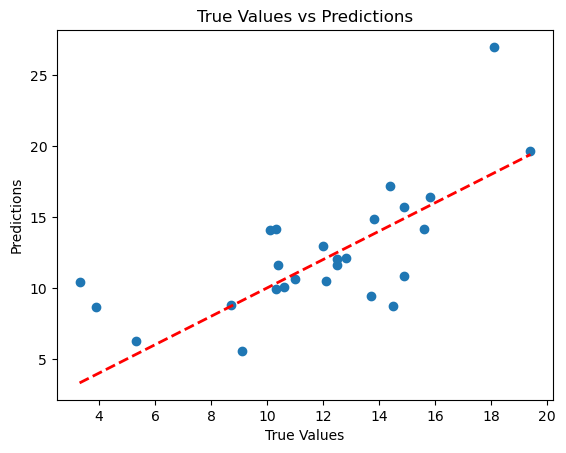

In [163]:
plt.scatter(y_test, y_test_predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

We can see that the values seem not too far from the line, but let's use the Mean Absolute Error and Mean Squared error to have a better understanding

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_test_predicted)
mse = mean_squared_error(y_test, y_test_predicted)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 2.3674725000974823
Mean Squared Error: 10.925929430485779


We have a lot of discrepencies in our datas, so we will prioritise the MSE results in the analysis. Here the average of error is 3,3h (square root of 10.9).

Let's try another model to see if we can have a better result.

### Let's use a Random Forest

In [165]:
from sklearn.metrics import classification_report

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
rf_model = RandomForestClassifier()

In [168]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

The trained data seems to be more closer from the line than with the Linear Regression, let's check its MSE and MAE.

In [169]:
y_test_predicted_rf = rf_model.predict(X_test)

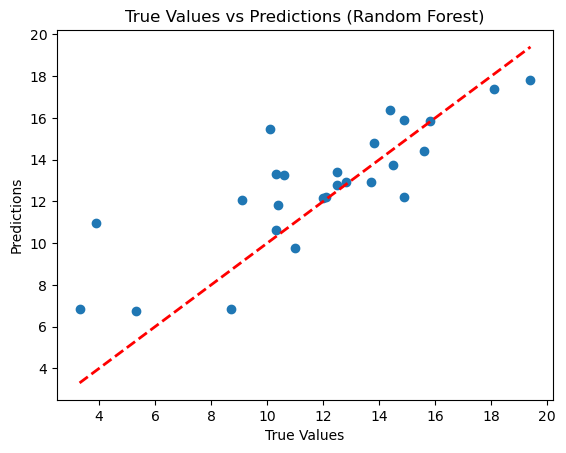

In [170]:
plt.scatter(y_test, y_test_predicted_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Random Forest)')
plt.show()

In [171]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_rf = mean_absolute_error(y_test, y_test_predicted_rf)
mse_rf = mean_squared_error(y_test, y_test_predicted_rf)

print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Absolute Error (Random Forest): 1.6957692307692267
Mean Squared Error (Random Forest): 5.5775266153846035


The MSE and MSA values are smaller than with the Linear Regression, which means that the Random Forest managed to be closer from the truth.
The average error is about 2.2h.

Let's try another model with a Neural Network

### Neural Network

In [172]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=10000)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=10000)

The values seems to be really far from the expected ones, the model doesn't seems to fit with our datas, but let's calculate the MSE and MAE

In [173]:
y_test_predicted_nn = nn_model.predict(X_test)

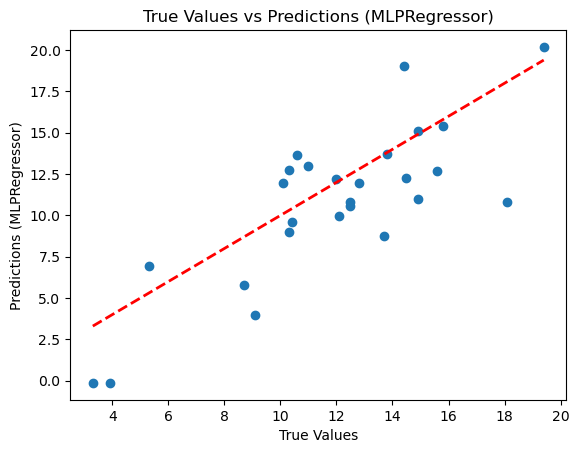

In [174]:
plt.scatter(y_test, y_test_predicted_nn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions (MLPRegressor)')
plt.title('True Values vs Predictions (MLPRegressor)')
plt.show()

In [175]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae_nn = mean_absolute_error(y_test, y_test_predicted_nn)
mse_nn = mean_squared_error(y_test, y_test_predicted_nn)

print(f'Mean Absolute Error (MLPRegressor): {mae_nn}')
print(f'Mean Squared Error (MLPRegressor): {mse_nn}')

Mean Absolute Error (MLPRegressor): 2.4136192854062726
Mean Squared Error (MLPRegressor): 8.91255872734293


The model is really far from the expected values, with an average of 14-18h of error in a 24h day, the model isn't usable. 

In [176]:
df.TotalSleep.mean()

10.627906976744185

We have an average of 2.2h of error for a mean of the column of 10 hours. It represents 20% of the mean of the value which seems quite a bit too much, but we didn't manage to make it less than that.

## Dreaming modelling

Let's get the values of the colomns for the test data. We take all the columns minus Dreaming for the X, and the Dreaming column for the Y

In [177]:
X_train = df_train.loc[:,['BodyWt', 'TotalSleep', 'LifeSpan', 'Gestation',
       'Predation', 'Exposure', 'Danger', 'carni', 'herbi', 'insecti', 'omni',
       'cd', 'cr', 'domesticated', 'en', 'lc', 'nt', 'vu', 'Afrosoricida',
       'Artiodactyla', 'Carnivora', 'Cetacea', 'Chiroptera', 'Cingulata',
       'Didelphimorphia', 'Diprotodontia', 'Erinaceomorpha', 'Hyracoidea',
       'Lagomorpha', 'Monotremata', 'Perissodactyla', 'Pilosa', 'Primates',
       'Proboscidea', 'Rodentia', 'Soricomorpha']].values
y_train = df_train.Dreaming.values

In [178]:
X_test = df_test.loc[:,['BodyWt', 'TotalSleep', 'LifeSpan', 'Gestation',
       'Predation', 'Exposure', 'Danger', 'carni', 'herbi', 'insecti', 'omni',
       'cd', 'cr', 'domesticated', 'en', 'lc', 'nt', 'vu', 'Afrosoricida',
       'Artiodactyla', 'Carnivora', 'Cetacea', 'Chiroptera', 'Cingulata',
       'Didelphimorphia', 'Diprotodontia', 'Erinaceomorpha', 'Hyracoidea',
       'Lagomorpha', 'Monotremata', 'Perissodactyla', 'Pilosa', 'Primates',
       'Proboscidea', 'Rodentia', 'Soricomorpha']].values
y_test = df_test.Dreaming.values

### Linear Regression

In [179]:
lr_model = LinearRegression()

In [180]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [181]:
y_test_predicted = lr_model.predict(X_test)

Let's plot the predicted results and the test values and compare them to the line x = y

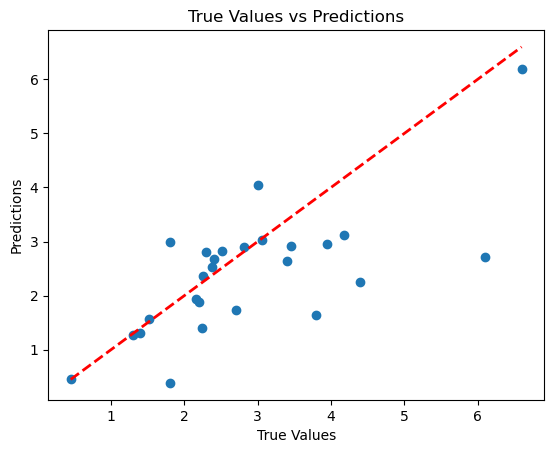

In [182]:
plt.scatter(y_test, y_test_predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

In [183]:
mae = mean_absolute_error(y_test, y_test_predicted)
mse = mean_squared_error(y_test, y_test_predicted)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

Mean Absolute Error: 0.7336551427666856
Mean Squared Error: 1.1784622197598709


We have in average 1.1h of error. It's quite a bit for the average values of Dreaming, so we'll try another model to try and reduce the error.

### Random Forest

In [184]:
rf_model = RandomForestClassifier()

In [185]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [186]:
y_test_predicted_rf = rf_model.predict(X_test)

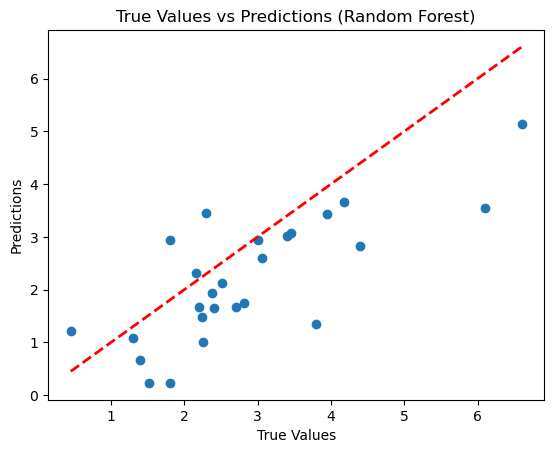

In [187]:
plt.scatter(y_test, y_test_predicted_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Random Forest)')
plt.show()

In [188]:
mae_rf = mean_absolute_error(y_test, y_test_predicted_rf)
mse_rf = mean_squared_error(y_test, y_test_predicted_rf)

print(f'Mean Absolute Error (Random Forest): {mae_rf}')
print(f'Mean Squared Error (Random Forest): {mse_rf}')

Mean Absolute Error (Random Forest): 0.9074038461538465
Mean Squared Error (Random Forest): 1.2168985988461531


The average error is very similar to the Linear Regression model, for both MAE and MSE.

Let's try another model to see if we can have a better result.

### Neural Network

In [189]:
nn_model = MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=10000)
nn_model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(20, 10), max_iter=10000)

In [190]:
y_test_predicted_nn = nn_model.predict(X_test)

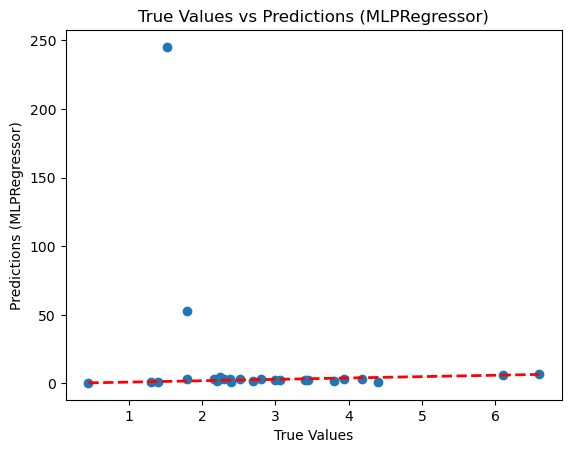

In [191]:
plt.scatter(y_test, y_test_predicted_nn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predictions (MLPRegressor)')
plt.title('True Values vs Predictions (MLPRegressor)')
plt.show()

In [192]:
mae_nn = mean_absolute_error(y_test, y_test_predicted_nn)
mse_nn = mean_squared_error(y_test, y_test_predicted_nn)

print(f'Mean Absolute Error (MLPRegressor): {mae_nn}')
print(f'Mean Squared Error (MLPRegressor): {mse_nn}')

Mean Absolute Error (MLPRegressor): 12.16098262974426
Mean Squared Error (MLPRegressor): 2384.5864195438253


The model as in the TotalSleep ones, isn't reliable. The error is way too out of proportion for being usefull.

In [193]:
df.Dreaming.mean()

2.0551162790697672

We have an average of 1.1h of error for a mean of the column of 2 hours. It represents 50% of the mean of the value which is really too much, but we didn't manage to make it less than that.

# Conclusion

The number of rows in the dataset was really low for a Machine Learning project.
We did our best to clean the dataset and choose which columns to keep and which to drop.
We used 3 different models for each of the TotalSleep and Dreaming column that allowed us to have relatively working models.

For the Sleeping model, the best that worked for us was the Random Forest, with an average of error of 2.2 hours. The Linear Regression was close behind, and the Neural Network was not functionning at all.

The error represents about 20% of the mean value of the column. You could use this model but you have to keep in mind that the valors are not really accurate and have à 20% error.

For the Dreaming model, the best that worked for us was the Random Forest and the Linear Regression, both with an average of error of 1.1 hours. The Neural Network was not functionning at all.

The error represents about 50% of the mean value of the column wich is really a lot. We do not recommend using this model.
In retrospective, it makes sense, other than the fact that we had not much datas and 1/3 of the Dreaming column was filled with artificial datas, the dreaming state should have more link with the development of the brain, the activity of the brain, more brains related datas than the type of food they eat or the state of conservation of their species.

In [194]:
from sklearn.tree import DecisionTreeRegressor

# Initialisation du modèle DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)

# Entraînement du modèle
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Mean Absolute Error: 1.1553846153846155
Mean Squared Error: 1.9349076923076924


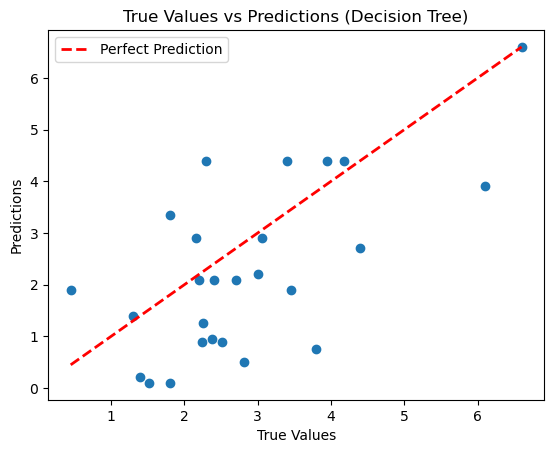

In [195]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prédictions sur l'ensemble de test
y_test_predicted = dt_model.predict(X_test)

# Calcul des métriques d'évaluation
mae = mean_absolute_error(y_test, y_test_predicted)
mse = mean_squared_error(y_test, y_test_predicted)

# Affichage des résultats
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Tracé des prédictions par rapport aux vraies valeurs
plt.scatter(y_test, y_test_predicted)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions (Decision Tree)')
plt.legend()
plt.show()